***1. Import Library***

In [47]:
# Import Required Libraries
from pathlib import Path
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

***2. Load Images dari Folders***

* train_dir dan test_dir: Mendefinisikan jalur direktori untuk gambar pelatihan dan pengujian.
* load_images_from_folder(folder): Fungsi untuk memuat gambar dan label dari folder.
    * images dan labels: Daftar untuk menyimpan gambar dan label yang dimuat.
    * os.listdir(folder): Mengambil daftar nama folder (kelas) dalam direktori yang diberikan.
    * cv2.imread(img_path): Membaca gambar dari jalur yang diberikan.
    * cv2.resize(img, (64, 64)): Mengubah ukuran gambar agar konsisten (dalam hal ini, 64x64 piksel).
    * Mengembalikan dua daftar: images dan labels.

In [48]:
# Direktori gambar
train_dir = "images/training/"
test_dir = "images/test/"

In [49]:
# Fungsi untuk memuat gambar dari folder
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        if os.path.isdir(label_path):
            for filename in os.listdir(label_path):
                img_path = os.path.join(label_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (64, 64))  # Ubah ukuran sesuai kebutuhan
                    images.append(img)
                    labels.append(label)
    return images, labels

* Mendefinisikan fungsi untuk menghitung histogram warna dan histogram kecerahan dari gambar.

In [50]:
# Fungsi untuk menghitung histogram
def compute_histogram(image):
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

* compute_histogram(image): Fungsi untuk menghitung histogram warna gambar.

    * cv2.calcHist: Menghitung histogram untuk channel warna (BGR) dengan 8 bin untuk setiap channel.
    * cv2.normalize: Menormalisasi histogram sehingga total frekuensi menjadi 1, membuat histogram lebih mudah dibandingkan antar gambar.
    * .flatten(): Mengubah histogram menjadi satu dimensi.
* brightness_histogram(image): Fungsi untuk menghitung histogram kecerahan (V channel) dari gambar.
    * cv2.cvtColor(image, cv2.COLOR_BGR2HSV): Mengonversi gambar dari ruang warna BGR ke HSV (Hue, Saturation, Value).
    * hist = cv2.calcHist([hsv_image], [2], None, [256], [0, 256]): Menghitung histogram untuk channel kecerahan (V).
    * Sama seperti di atas, histogram dinormalisasi dan diratakan.

In [51]:
# Fungsi untuk mengekstrak fitur dari gambar
def extract_features(images):
    features = []
    for image in images:
        hist = compute_histogram(image)
        features.append(hist)
    return np.array(features)

In [52]:
# Fungsi untuk menghitung histogram kecerahan (V)
def brightness_histogram(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv_image], [2], None, [256], [0, 256])  # V channel
    hist = cv2.normalize(hist, hist).flatten()
    return hist

In [72]:
# Memeriksa histogram kecerahan pada gambar acak
rand_img_index = np.random.randint(0, len(train_images))
feature_img = train_images[rand_img_index]


In [73]:
# Hitung histogram kecerahan
brightness_histogram_img = brightness_histogram(feature_img)

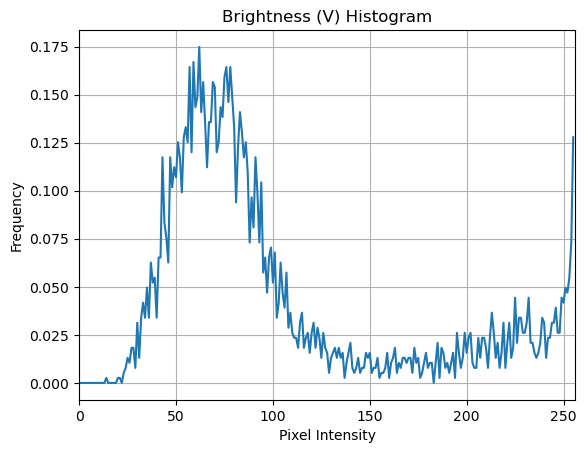

In [74]:
# Tampilkan histogram kecerahan
plt.plot(brightness_histogram_img)
plt.title("Brightness (V) Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 256])  # Batas sumbu x sesuai dengan intensitas pixel
plt.grid()
plt.show()

***3. Ekstrasi Fitur***

* load_images_from_folder(train_dir): Memanggil fungsi untuk memuat gambar dan label dari folder pelatihan.
* train_features: Daftar yang diisi dengan histogram warna untuk setiap gambar pelatihan.
* load_images_from_folder(test_dir): Memanggil fungsi untuk memuat gambar dan label dari folder pengujian.
* test_features: Daftar yang diisi dengan histogram warna untuk setiap gambar pengujian.

In [75]:
# Memuat gambar pelatihan
train_images, train_labels = load_images_from_folder(train_dir)
train_features = extract_features(train_images)

In [76]:
# Memuat gambar pengujian
test_images, test_labels = load_images_from_folder(test_dir)
test_features = extract_features(test_images)

***4. Encoding Label***

* LabelEncoder(): Membuat instance untuk mengonversi label teks menjadi numerik.
* fit_transform(train_labels): Mengonversi label pelatihan dari teks ke format numerik.
* transform(test_labels): Mengonversi label pengujian berdasarkan mapping yang sama

In [77]:
# Mengencode label
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

***5. Train SVM Model***

* SVC(kernel='linear'): Membuat model SVM dengan kernel linear.
* fit(train_features, train_labels_encoded): Melatih model menggunakan fitur yang diekstrak dan label yang sudah dienkode.

In [83]:
# Inisialisasi model SVM
svm_model = SVC(kernel='linear')
# Melatih model
svm_model.fit(train_features, train_labels_encoded)

SVC(kernel='linear')

***6. Prediksi Data Pengujian***

predict(test_features): Menggunakan model terlatih untuk melakukan prediksi pada data pengujian.

In [84]:
# Melakukan prediksi
test_predictions = svm_model.predict(test_features)

***7. Evaluasi Model***

* accuracy_score(test_labels_encoded, test_predictions): Menghitung akurasi model dengan membandingkan label yang sebenarnya dengan prediksi.
* menampilkan akurasi.
* classification_report: Menampilkan laporan klasifikasi yang mencakup precision, recall, F1-score, dan support untuk setiap kelas.

In [85]:
# Mengevaluasi akurasi
accuracy = accuracy_score(test_labels_encoded, test_predictions)

print(f'Accuracy: {accuracy_score(test_labels_encoded, test_predictions)}')
print(f'Accuracy Percentage: {accuracy * 100:.2f}%')

Accuracy: 0.94375
Accuracy Percentage: 94.38%


In [86]:
# Menampilkan laporan klasifikasi
print(classification_report(test_labels_encoded, test_predictions, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

         day       1.00      0.89      0.94        80
       night       0.90      1.00      0.95        80

    accuracy                           0.94       160
   macro avg       0.95      0.94      0.94       160
weighted avg       0.95      0.94      0.94       160

